In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from stim_surface_code.memory import MemoryPatch
from stim_surface_code import noise

# Basic usage

In [2]:
m = MemoryPatch(5,5,5, id_offset=100)
m

--------------------------------------------------------
|    |    |X125|    |    |    |X126|    |    |    |    |
----------+----+--------------+----+--------------------
|    | 100|    | 101|    | 102|    | 103|    | 104|    |
----------+----+----+----+----+----+----+----+----+-----
|    |    |Z127|    |X128|    |Z129|    |X130|    |Z131|
----------+----+----+----+----+----+----+----+----+-----
|    | 105|    | 106|    | 107|    | 108|    | 109|    |
-----+----+----+----+----+----+----+----+----+----------
|Z132|    |X133|    |Z134|    |X135|    |Z136|    |    |
-----+----+----+----+----+----+----+----+----+----------
|    |L110|    |L111|    |L112|    |L113|    |L114|    |
----------+----+----+----+----+----+----+----+----+-----
|    |    |Z137|    |X138|    |Z139|    |X140|    |Z141|
----------+----+----+----+----+----+----+----+----+-----
|    | 115|    | 116|    | 117|    | 118|    | 119|    |
-----+----+----+----+----+----+----+----+----+----------
|Z142|    |X143|    |Z144|    |

In [3]:
# 10x better noise vals than Google's device
noise_params = noise.GoogleNoiseParams.improve(10)

print(noise_params.error_means)
print(noise_params.error_stdevs)

{'T1': 0.0002, 'T2': 0.00030000000000000003, 'gate1_err': 9.015368548802825e-07, 'gate2_err': 0.00035424042547487725, 'readout_err': 0.0002, 'erasure': 0.0}
{'T1': 1.9999999999999998e-05, 'T2': 5e-05, 'gate1_err': 1.0000000000000002e-06, 'gate2_err': 5e-05, 'readout_err': 0.0001, 'erasure': 0.0}


In [4]:
noise_params.set_patch_err_vals(m)

In [5]:
m.count_logical_errors()

(0.0008666, 10000000)

# Increasing d

In [10]:
def get_noise_params(p):
    return noise.NoiseParams(
        {
            'T1':np.inf, 
            'T2':np.inf, 
            'gate1_err':p,
            'gate2_err':p,
            'readout_err':p,
            'erasure':0,
        },
    )

In [11]:
# see how to do this more efficiently in notebook 03_sinter.ipynb!
ds = [3,5,7]
ps = np.geomspace(5e-2,1e-3,5)
z_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = MemoryPatch(d, d, d)
        get_noise_params(p).set_patch_err_vals(m)
        ler = m.count_logical_errors(shots=10**6, observable_basis='Z')[0]
        z_vals[i,j] = ler

In [12]:
ds = [3,5,7]
ps = np.geomspace(5e-2,1e-3,5)
x_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = MemoryPatch(d, d, d)
        get_noise_params(p).set_patch_err_vals(m)
        ler = m.count_logical_errors(shots=10**6, observable_basis='X')[0]
        x_vals[i,j] = ler

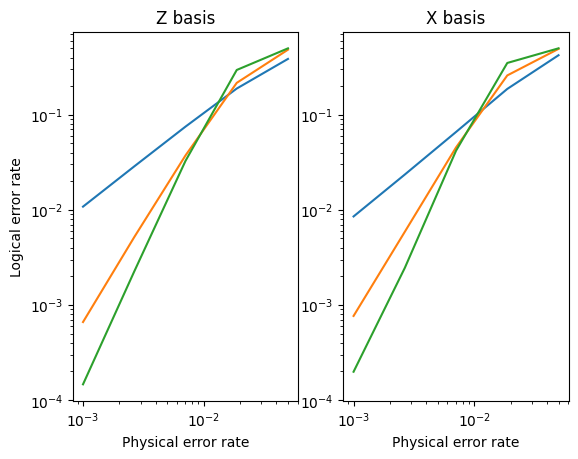

In [13]:
ax1 = plt.subplot(121)
ax1.plot(ps, z_vals.T)
ax1.loglog()
ax1.set_ylabel('Logical error rate')
ax1.set_title('Z basis')
ax1.set_xlabel('Physical error rate')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(ps, x_vals.T)
ax2.loglog()
ax2.set_title('X basis')
ax2.set_xlabel('Physical error rate')

plt.show()

In [24]:
def get_noise_params(p):
    return noise.NoiseParams(
        {
            'T1':np.inf, 
            'T2':np.inf, 
            'gate1_err':p,
            'gate2_err':p,
            'readout_err':p,
            'erasure':p,
        },
    )
d = 3
m = MemoryPatch(d, d, d)
get_noise_params(1e-3).set_patch_err_vals(m)

In [22]:
m.get_stim().compile_detector_sampler().__dict__

AttributeError: 'stim._stim_polyfill.CompiledDetectorSampler' object has no attribute '__dict__'

In [25]:
m.get_stim().get_detector_coordinates() 

{0: [0.0, 2.0, 0.0, 1.0],
 1: [2.0, 4.0, 0.0, 1.0],
 2: [4.0, 2.0, 0.0, 1.0],
 3: [6.0, 4.0, 0.0, 1.0],
 4: [2.0, 2.0, 0.0, 1.0],
 5: [2.0, 6.0, 0.0, 1.0],
 6: [4.0, 0.0, 0.0, 1.0],
 7: [4.0, 4.0, 0.0, 1.0],
 8: [1.0, 1.0, 0.0, 1.0],
 9: [3.0, 1.0, 0.0, 1.0],
 10: [5.0, 1.0, 0.0, 1.0],
 11: [1.0, 3.0, 0.0, 1.0],
 12: [3.0, 3.0, 0.0, 1.0],
 13: [5.0, 3.0, 0.0, 1.0],
 14: [1.0, 5.0, 0.0, 1.0],
 15: [3.0, 5.0, 0.0, 1.0],
 16: [5.0, 5.0, 0.0, 1.0],
 17: [2.0, 2.0, 0.0],
 18: [2.0, 6.0, 0.0],
 19: [4.0, 0.0, 0.0],
 20: [4.0, 4.0, 0.0],
 21: [0.0, 2.0, 1.0, 1.0],
 22: [2.0, 4.0, 1.0, 1.0],
 23: [4.0, 2.0, 1.0, 1.0],
 24: [6.0, 4.0, 1.0, 1.0],
 25: [2.0, 2.0, 1.0, 1.0],
 26: [2.0, 6.0, 1.0, 1.0],
 27: [4.0, 0.0, 1.0, 1.0],
 28: [4.0, 4.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0],
 30: [3.0, 1.0, 1.0, 1.0],
 31: [5.0, 1.0, 1.0, 1.0],
 32: [1.0, 3.0, 1.0, 1.0],
 33: [3.0, 3.0, 1.0, 1.0],
 34: [5.0, 3.0, 1.0, 1.0],
 35: [1.0, 5.0, 1.0, 1.0],
 36: [3.0, 5.0, 1.0, 1.0],
 37: [5.0, 5.0, 1.0, 1.0],
 38: